In [ ]:
# A sorting algorithm doing binary classification on the 3D volume data of each core sample is designed by using machine learning for making the final accept/reject decision.
# However, supervised learning models always need large datasets for training, validation, and testing.
# The current 15 cores’ images are definitely not sufficient for the classification.
# Therefore, the 15 images will all be used as the training set to briefly show the classification’s performance.
# For training a machine learning model better, more data are required in the future.

(15, 4)


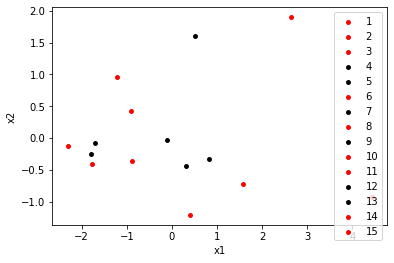

In [ ]:
# Step 2: PCA is used to reduce the four dimensions in the data (maximum, median, average, and standard deviation of the 3D volume data) to two dimensions,
# for showing the final classification result more clearly and making the data easier to be processed further.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = np.genfromtxt('the dataset file path',delimiter=',') # the dataset from Step 1
# The data points are labeled based on the gold grade data of core samples.
# Gold grade data of the 15 core samples were measured by using gold fire assay.
# 400ppb is considered as the cut-off grade, thereby being used as the threshold between the “accept” and “reject” labels.
color = ["r", "r", "r", "k", "k", "r", "k", "r", "k", "r", "r", "k", "k", "r", "r"] #"r" represents "accept", and "k" represents "reject"
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

for i in range(Z.shape[0]):
  plt.scatter(Z[i,0], Z[i,1], c = color[i], s = 15, label = str(i+1), cmap = plt.cm.Set1) # The column number of Z refers to the index of feature.
plt.xlabel('x1') # x1 and x2 are the two features after compression.
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
# Step 3: We use various classifiers in Scikit-Learn to make the binary classification and compare their performances.

# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

y = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]) # 1 represents "accept", and 0 represents "reject"
clf = SVC(kernel="rbf",C = 1,gamma = "auto").fit(Z, y)
# Plotting decision regions
x_min, x_max = Z[:, 0].min() - 0.5, Z[:, 0].max() + 0.5
y_min, y_max = Z[:, 1].min() - 0.5, Z[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
ZZ = clf.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = ZZ.reshape(xx.shape)
plt.scatter(Z[y==0,0], Z[y==0,1], c = 'k', s = 5, label = "0", cmap = plt.cm.Set1)
plt.scatter(Z[y==1,0], Z[y==1,1], c = 'r', s = 5, label = "1", cmap = plt.cm.Set1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.contourf(xx, yy, ZZ, alpha=0.4)
plt.show()

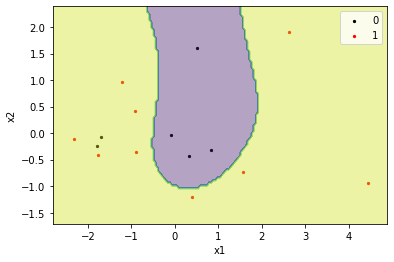

In [ ]:
# GPC
from sklearn.gaussian_process import GaussianProcessClassifier
y = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])
gpc = GaussianProcessClassifier(random_state=0).fit(Z, y)
# Plotting decision regions
x_min, x_max = Z[:, 0].min() - 0.5, Z[:, 0].max() + 0.5
y_min, y_max = Z[:, 1].min() - 0.5, Z[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
ZZ = gpc.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = ZZ.reshape(xx.shape)
plt.scatter(Z[y==0,0], Z[y==0,1], c = 'k', s = 5, label = "0", cmap = plt.cm.Set1)
plt.scatter(Z[y==1,0], Z[y==1,1], c = 'r', s = 5, label = "1", cmap = plt.cm.Set1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.contourf(xx, yy, ZZ, alpha=0.4)
plt.show()

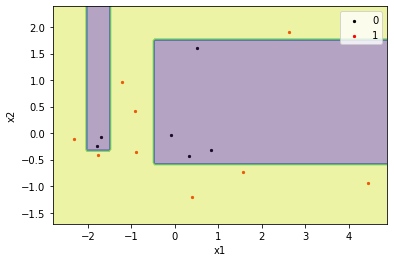

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
y = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])
dtc = DecisionTreeClassifier(random_state=0).fit(Z, y)
# Plotting decision regions
x_min, x_max = Z[:, 0].min() - 0.5, Z[:, 0].max() + 0.5
y_min, y_max = Z[:, 1].min() - 0.5, Z[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
ZZ = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = ZZ.reshape(xx.shape)
plt.scatter(Z[y==0,0], Z[y==0,1], c = 'k', s = 5, label = "0", cmap = plt.cm.Set1)
plt.scatter(Z[y==1,0], Z[y==1,1], c = 'r', s = 5, label = "1", cmap = plt.cm.Set1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.contourf(xx, yy, ZZ, alpha=0.4)
plt.show()

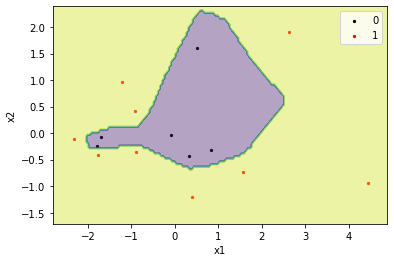

In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier
y = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])
nn = MLPClassifier(random_state=1,max_iter=10000).fit(Z, y)
# Plotting decision regions
x_min, x_max = Z[:, 0].min() - 0.5, Z[:, 0].max() + 0.5
y_min, y_max = Z[:, 1].min() - 0.5, Z[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
ZZ = nn.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = ZZ.reshape(xx.shape)
plt.scatter(Z[y==0,0], Z[y==0,1], c = 'k', s = 5, label = "0", cmap = plt.cm.Set1)
plt.scatter(Z[y==1,0], Z[y==1,1], c = 'r', s = 5, label = "1", cmap = plt.cm.Set1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.contourf(xx, yy, ZZ, alpha=0.4)
plt.show()

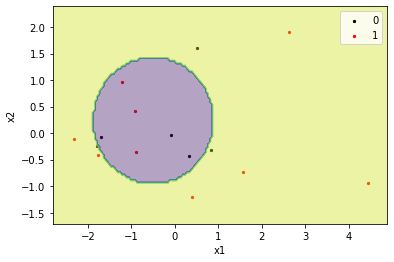

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
y = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])
NB = GaussianNB().fit(Z, y)
# Plotting decision regions
x_min, x_max = Z[:, 0].min() - 0.5, Z[:, 0].max() + 0.5
y_min, y_max = Z[:, 1].min() - 0.5, Z[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
ZZ = NB.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = ZZ.reshape(xx.shape)
plt.scatter(Z[y==0,0], Z[y==0,1], c = 'k', s = 5, label = "0", cmap = plt.cm.Set1)
plt.scatter(Z[y==1,0], Z[y==1,1], c = 'r', s = 5, label = "1", cmap = plt.cm.Set1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.contourf(xx, yy, ZZ, alpha=0.4)
plt.show()